In [1]:
import cv2

filepath = "split/GH010005-00.mp4"
gif = []

cap = cv2.VideoCapture(filepath)
i = 1
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        gif.append(frame[:,:,::-1])
        i += 1
        if i % 300 == 0:
            print(i, end=" ")
    else:
        cap.release()

300 600 900 1200 1500 1800 

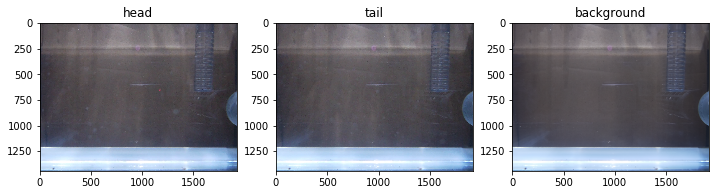

In [2]:
t_bg = 4  # PARAM
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.title("head"); plt.imshow(gif[t_bg * 30])

plt.subplot(1,3,2)
plt.title("tail"); plt.imshow(gif[(t_bg+1) * 30])

bg_orig = np.array(gif[t_bg * 30: (t_bg+1) * 30])
bg = np.mean(bg_orig, 0).astype(np.uint8)
plt.subplot(1,3,3)
plt.title("background"); plt.imshow(bg)
plt.show()

15237894
20
1689513 267124 103753 168604 103661 
1689513


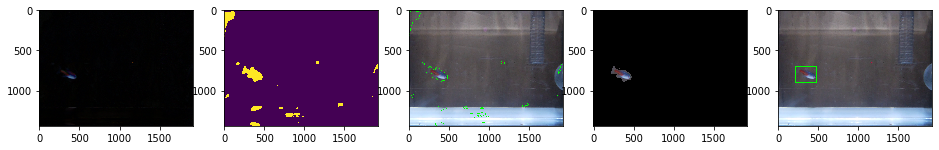

In [3]:
from copy import deepcopy
plt.figure(figsize=(16,16))

img = np.array(gif[398:403]).mean(0).astype(np.uint8)  # PARAM
diff_img = cv2.absdiff(bg, img)
diff_all = np.sum(diff_img)
print(diff_all)
plt.subplot(1,5,1)
plt.imshow(diff_img)  # diff_img * 2 or diff_img + bg * mask * 0.8(透過率の再現)

img = np.sum(diff_img, 2)
img = cv2.blur(img,(32,32))  # PARAM
img = np.where(img < 12, 0, 1).astype(np.uint8)  # PARAM  # 12 ~ 21(しっぽが見えるギリギリライン)
plt.subplot(1,5,2)
plt.imshow(img)

contours, hierarchy = cv2.findContours(deepcopy(img), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours.sort(key=cv2.contourArea, reverse=True)
print(len(contours))
img = cv2.drawContours(deepcopy(gif[400]), contours, -1, (0,255,0), 3)
plt.subplot(1,5,3)
plt.imshow(img)

best_i = None
best_diff = 0
for i, c in enumerate(contours[:5]):  # PARAM
    mask = cv2.fillConvexPoly(deepcopy(diff_img), c, (0,0,0))
    diff_i = diff_all - np.sum(mask)
    print(diff_i, end = " ")
    if best_diff < diff_i:
        best_diff = diff_i
        best_i = i
print(); print(best_diff)
mask = cv2.fillConvexPoly(deepcopy(gif[400]), contours[best_i], (0,0,0))
plt.subplot(1,5,4)
plt.imshow(deepcopy(gif[400]) - mask)

x,y,w,h = cv2.boundingRect(contours[best_i])
img = cv2.rectangle(deepcopy(gif[400]),(x,y),(x+w,y+h),(0,255,0),10)
plt.subplot(1,5,5)
plt.imshow(img)

plt.show()

- best_diffと切り抜いた画像を保存しておく。
- 最後に、split_video内でbest_diffのhistgramを書いて、大きいのから順に採用する。

218 699 264 200


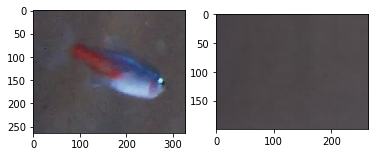

In [5]:
margin = 32

x,y,w,h = cv2.boundingRect(contours[best_i])
print(x,y,w,h)
# try:
img_t = gif[400][y-margin:y+h+margin, x-margin:x+w+margin]
if 0 in img_t.shape:
    pass
else:
    plt.subplot(1,2,1)
    plt.imshow(img_t)

    bg_t = bg[y:y+h, x:x+w]
    plt.subplot(1,2,2)
    plt.imshow(bg_t)

    plt.show()

- contoursが0個の場合
- 外接矩形が端っこにある場合